<a href="https://colab.research.google.com/github/svetamorag/publicLabs/blob/main/ExpertHub_TKS2/IL_CE_Team_StableD2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authentication

In [ ]:
PROJECT_ID = "sveta-visionaitest"  # @param {type:"string"}

from google.colab import auth as google_auth
google_auth.authenticate_user(project_id=PROJECT_ID)

#Dependencies


In [ ]:
!pip install google-cloud-aiplatform
!pip install protobuf


In [ ]:
from typing import Dict, List, Union

from google.cloud import aiplatform
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
from google.cloud import storage
import io
import base64
from io import BytesIO
from PIL import Image

import matplotlib.pyplot as plt


#Helpers

In [ ]:
def image_to_base64(image, format="JPEG"):
    buffer = BytesIO()
    image.save(buffer, format=format)
    image_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return image_str


def base64_to_image(image_str):
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image

def save_image_to_bucket(image, bucket_name, object_name):
      client = storage.Client()

      # Create a blob object.
      blob = client.bucket(bucket_name).blob(object_name)
      imgByteArr = io.BytesIO()
      # image.save expects a file-like as a argument
      img1.save(imgByteArr, format=img1.format)
      # Turn the BytesIO object back into a bytes object
      imgByteArr = imgByteArr.getvalue()

      blob.upload_from_string(imgByteArr, content_type="image/jpeg"  )


#Work with Vertex AI Endpoint

In [ ]:

def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com"):


    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instances = instances if type(instances) == list else [instances]
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances, parameters=parameters
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    predictions = response.predictions
    return predictions


def generateImageFromPrompt(text):
    return predict_custom_trained_model_sample(
        project="1045041583947",
        endpoint_id="1128752040005074944",
        location="us-central1",
        instances=[{ "prompt": text, "negative_prompt":"ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, bad anatomy, watermark, signature, cut off, low contrast, underexposed, overexposed, bad art, beginner, amateur, distorted face"}]
    )


# Call endpoint

In [33]:
images=generateImageFromPrompt("A person eating an apple on the beach,artstation, highly detailed, sharp focus, stunningly beautiful")
# images=generateImageFromPrompt("A smartphone on the table with a glass of wine, black and white")
# images=generateImageFromPrompt("a smartphone on a table in the garden ,artstation, highly detailed, sharp focus, stunningly beautiful, dystopian, iridescent gold, cinematic lighting")

response
 deployed_model_id: 2875735279052783616


#Finalization



<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x768 at 0x7C364227D450>


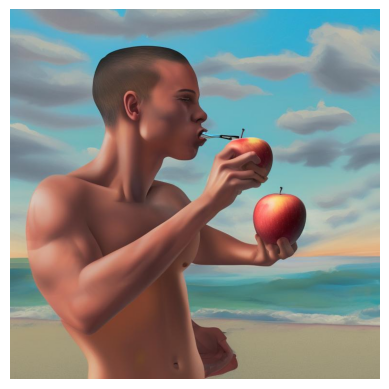

In [34]:
for img in images:
      img1=base64_to_image(img)
      print(img1)
      plt.imshow(img1)
      plt.axis('off')
      plt.show()

      #Upload image to Cloud Storage bucket
      #save_image_to_bucket(img,"vision-teststorage","MarektingImage3.jpeg")